In [2]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()
provider.has_service('runtime')

True

In [42]:
# useful additional packages
import matplotlib.pyplot as plt
import matplotlib.axes as axes
%matplotlib inline
import numpy as np
import networkx as nx

from qiskit import Aer
from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.library import TwoLocal, EfficientSU2
from qiskit_optimization.applications import Maxcut, Tsp
from qiskit.algorithms import VQE, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import SPSA,COBYLA
from qiskit.utils import algorithm_globals
from qiskit.utils import QuantumInstance
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.problems import QuadraticProgram

import requests
import json
import time
import sys

distance
 [[ 0. 48. 91. 33.]
 [48.  0. 63. 71.]
 [91. 63.  0. 92.]
 [33. 71. 92.  0.]]


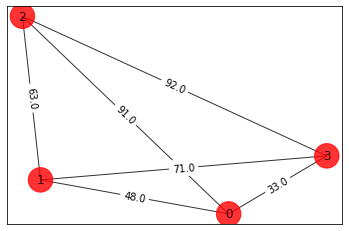

In [4]:
n = 4
num_qubits = n ** 2
tsp = Tsp.create_random_instance(n, seed=123)
adj_matrix = nx.to_numpy_matrix(tsp.graph)
print('distance\n', adj_matrix)

colors = ['r' for node in tsp.graph.nodes]
pos = [tsp.graph.nodes[node]['pos']  for node in tsp.graph.nodes]
def draw_graph(G, colors, pos):
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G, node_color=colors, node_size=600, alpha=.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
draw_graph(tsp.graph, colors, pos)

order = (0, 1, 2, 3) Distance = 236.0
Best order from brute force = (0, 1, 2, 3) with total distance = 236.0


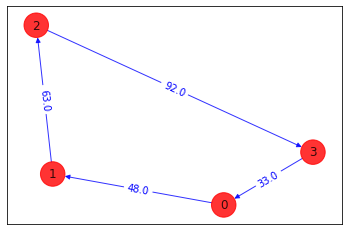

In [5]:
from itertools import permutations

def brute_force_tsp(w, N):
    a = list(permutations(range(1,N)))
    last_best_distance = 1e10
    for i in a:
        distance = 0
        pre_j = 0
        for j in i:
            distance = distance + w[j,pre_j]
            pre_j = j
        distance = distance + w[pre_j,0]
        order = (0,) + i
        if distance < last_best_distance:
            best_order = order
            last_best_distance = distance
            print('order = ' + str(order) + ' Distance = ' + str(distance))
    return last_best_distance, best_order
  
best_distance, best_order = brute_force_tsp(adj_matrix , n)
print('Best order from brute force = ' + str(best_order) + ' with total distance = ' + str(best_distance))

def draw_tsp_solution(G, order, colors, pos):
    G2 = nx.DiGraph()
    G2.add_nodes_from(G)
    n = len(order)
    for i in range(n):
        j = (i + 1) % n
        G2.add_edge(order[i], order[j], weight=G[order[i]][order[j]]['weight'])
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G2, node_color=colors, edge_color='b', node_size=600, alpha=.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G2, 'weight')
    nx.draw_networkx_edge_labels(G2, pos, font_color='b', edge_labels=edge_labels)
    
draw_tsp_solution(tsp.graph, best_order, colors, pos)

In [6]:
qp = tsp.to_quadratic_program()
print(qp.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: TSP

Minimize
 obj: [ 96 x_0_0*x_1_1 + 96 x_0_0*x_1_3 + 182 x_0_0*x_2_1 + 182 x_0_0*x_2_3
      + 66 x_0_0*x_3_1 + 66 x_0_0*x_3_3 + 96 x_0_1*x_1_0 + 96 x_0_1*x_1_2
      + 182 x_0_1*x_2_0 + 182 x_0_1*x_2_2 + 66 x_0_1*x_3_0 + 66 x_0_1*x_3_2
      + 96 x_0_2*x_1_1 + 96 x_0_2*x_1_3 + 182 x_0_2*x_2_1 + 182 x_0_2*x_2_3
      + 66 x_0_2*x_3_1 + 66 x_0_2*x_3_3 + 96 x_0_3*x_1_0 + 96 x_0_3*x_1_2
      + 182 x_0_3*x_2_0 + 182 x_0_3*x_2_2 + 66 x_0_3*x_3_0 + 66 x_0_3*x_3_2
      + 126 x_1_0*x_2_1 + 126 x_1_0*x_2_3 + 142 x_1_0*x_3_1 + 142 x_1_0*x_3_3
      + 126 x_1_1*x_2_0 + 126 x_1_1*x_2_2 + 142 x_1_1*x_3_0 + 142 x_1_1*x_3_2
      + 126 x_1_2*x_2_1 + 126 x_1_2*x_2_3 + 142 x_1_2*x_3_1 + 142 x_1_2*x_3_3
      + 126 x_1_3*x_2_0 + 126 x_1_3*x_2_2 + 142 x_1_3*x_3_0 + 142 x_1_3*x_3_2
      + 184 x_2_0*x_3_1 + 184 x_2_0*x_3_3 + 184 x_2_1*x_3_0 + 184 x_2_1*x_3_2
      + 184 x_2_2*x_3_1 + 184 x_2_2*x_3_3 + 184 x_2_3*x_3_0 + 184

In [7]:
from qiskit_optimization.converters import QuadraticProgramToQubo

qp2qubo = QuadraticProgramToQubo()
qubo = qp2qubo.convert(qp)
qubitOp, offset = qubo.to_ising()
print('Offset:', offset)
print('Ising Hamiltonian:')
print(str(qubitOp))

Offset: 51756.0
Ising Hamiltonian:
-6468.0 * ZIIIIIIIIIIIIIII
- 6468.0 * IZIIIIIIIIIIIIII
+ 1592.5 * ZZIIIIIIIIIIIIII
- 6468.0 * IIZIIIIIIIIIIIII
+ 1592.5 * ZIZIIIIIIIIIIIII
+ 1592.5 * IZZIIIIIIIIIIIII
- 6468.0 * IIIZIIIIIIIIIIII
+ 1592.5 * ZIIZIIIIIIIIIIII
+ 1592.5 * IZIZIIIIIIIIIIII
+ 1592.5 * IIZZIIIIIIIIIIII
- 6493.0 * IIIIZIIIIIIIIIII
+ 1592.5 * ZIIIZIIIIIIIIIII
+ 23.0 * IZIIZIIIIIIIIIII
+ 23.0 * IIIZZIIIIIIIIIII
- 6493.0 * IIIIIZIIIIIIIIII
+ 23.0 * ZIIIIZIIIIIIIIII
+ 1592.5 * IZIIIZIIIIIIIIII
+ 23.0 * IIZIIZIIIIIIIIII
+ 1592.5 * IIIIZZIIIIIIIIII
- 6493.0 * IIIIIIZIIIIIIIII
+ 23.0 * IZIIIIZIIIIIIIII
+ 1592.5 * IIZIIIZIIIIIIIII
+ 23.0 * IIIZIIZIIIIIIIII
+ 1592.5 * IIIIZIZIIIIIIIII
+ 1592.5 * IIIIIZZIIIIIIIII
- 6493.0 * IIIIIIIZIIIIIIII
+ 23.0 * ZIIIIIIZIIIIIIII
+ 23.0 * IIZIIIIZIIIIIIII
+ 1592.5 * IIIZIIIZIIIIIIII
+ 1592.5 * IIIIZIIZIIIIIIII
+ 1592.5 * IIIIIZIZIIIIIIII
+ 1592.5 * IIIIIIZZIIIIIIII
- 6461.0 * IIIIIIIIZIIIIIII
+ 1592.5 * ZIIIIIIIZIIIIIII
+ 17.75 * IZIIIIIIZIIIIIII
+ 1

In [8]:
exact = MinimumEigenOptimizer(NumPyMinimumEigensolver())
result = exact.solve(qubo)
print(result)

optimal function value: 236.0
optimal value: [0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
status: SUCCESS


energy: -51520.0
tsp objective: 236.0
feasible: True
solution: [1, 2, 3, 0]
solution objective: 236.0


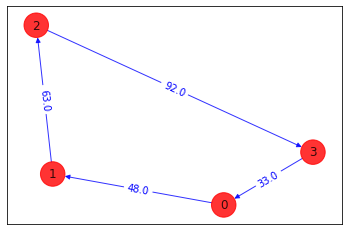

In [9]:

#Making the Hamiltonian in its full form and getting the lowest eigenvalue and eigenvector
ee = NumPyMinimumEigensolver()
result = ee.compute_minimum_eigenvalue(qubitOp)

print('energy:', result.eigenvalue.real)
print('tsp objective:', result.eigenvalue.real + offset)
x = tsp.sample_most_likely(result.eigenstate)
print('feasible:', qubo.is_feasible(x))
z = tsp.interpret(x)
print('solution:', z)
print('solution objective:', tsp.tsp_value(z, adj_matrix))
draw_tsp_solution(tsp.graph, z, colors, pos)

In [10]:
algorithm_globals.random_seed = 123
seed = 10598
backend = Aer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, seed_simulator=seed, seed_transpiler=seed)

energy: -47954.872070312485
time: 605.318763256073
feasible: True
solution: [3, 0, 2, 1]
solution objective: 258.0


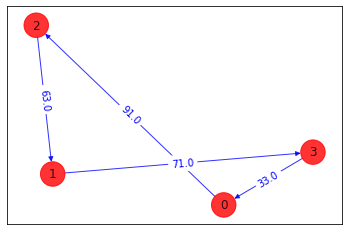

In [21]:
spsa = SPSA(maxiter=300)
ry = TwoLocal(qubitOp.num_qubits, 'ry', 'cz', reps=7, entanglement='linear')
#ry = EfficientSU2(qubitOp.num_qubits, su2_gates=['ry', 'cz'], entanglement='linear', reps=7)
vqe = VQE(ry, optimizer=spsa, quantum_instance=quantum_instance)

result = vqe.compute_minimum_eigenvalue(qubitOp)

print('energy:', result.eigenvalue.real)
print('time:', result.optimizer_time)
x = tsp.sample_most_likely(result.eigenstate)
print('feasible:', qubo.is_feasible(x))
z = tsp.interpret(x)
print('solution:', z)
print('solution objective:', tsp.tsp_value(z, adj_matrix))
draw_tsp_solution(tsp.graph, z, colors, pos)

optimal function value: 258.0
optimal value: [0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
status: SUCCESS
solution: [3, 0, 2, 1]
solution objective: 258.0


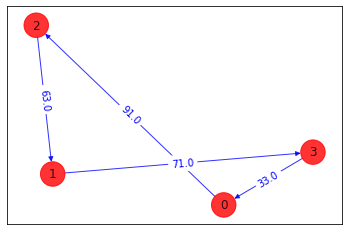

In [22]:
# create minimum eigen optimizer based on VQE
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
vqe_optimizer = MinimumEigenOptimizer(vqe)

# solve quadratic program
result = vqe_optimizer.solve(qp)
print(result)

z = tsp.interpret(x)
print('solution:', z)
print('solution objective:', tsp.tsp_value(z, adj_matrix))
draw_tsp_solution(tsp.graph, z, colors, pos)

In [11]:
from qiskit.circuit.library import EfficientSU2

spsa = SPSA(maxiter=300)
ry = TwoLocal(qubitOp.num_qubits, 'ry', 'cz', reps=7, entanglement='linear')
#ry = EfficientSU2(qubitOp.num_qubits, su2_gates=['ry', 'cz'], entanglement='linear', reps=7)
print(ry)

       ┌──────────┐   ┌───────────┐                          ┌───────────┐»
 q_0: ─┤ Ry(θ[0]) ├─■─┤ Ry(θ[16]) ├───────────────────■──────┤ Ry(θ[32]) ├»
       ├──────────┤ │ └───────────┘┌───────────┐      │      └───────────┘»
 q_1: ─┤ Ry(θ[1]) ├─■───────■──────┤ Ry(θ[17]) ├──────■────────────■──────»
       ├──────────┤         │      └───────────┘┌───────────┐      │      »
 q_2: ─┤ Ry(θ[2]) ├─────────■────────────■──────┤ Ry(θ[18]) ├──────■──────»
       ├──────────┤                      │      └───────────┘┌───────────┐»
 q_3: ─┤ Ry(θ[3]) ├──────────────────────■────────────■──────┤ Ry(θ[19]) ├»
       ├──────────┤                                   │      └───────────┘»
 q_4: ─┤ Ry(θ[4]) ├───────────────────────────────────■────────────■──────»
       ├──────────┤                                                │      »
 q_5: ─┤ Ry(θ[5]) ├────────────────────────────────────────────────■──────»
       ├──────────┤                                                       »
 q_6: ─┤ Ry(

<ipython-input-12-0e16dd920b12>:2: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  qc += ry
/opt/conda/lib/python3.8/site-packages/qiskit/circuit/quantumcircuit.py:942: DeprecationWarning: The QuantumCircuit.extend() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  return self.extend(rhs)


Figure(1604.72x2010.68)
Traceback (most recent call last):
  File "<ipython-input-12-0e16dd920b12>", line 4, in <module>
    print(ry.type)
AttributeError: 'TwoLocal' object has no attribute 'type'

Use %tb to get the full traceback.


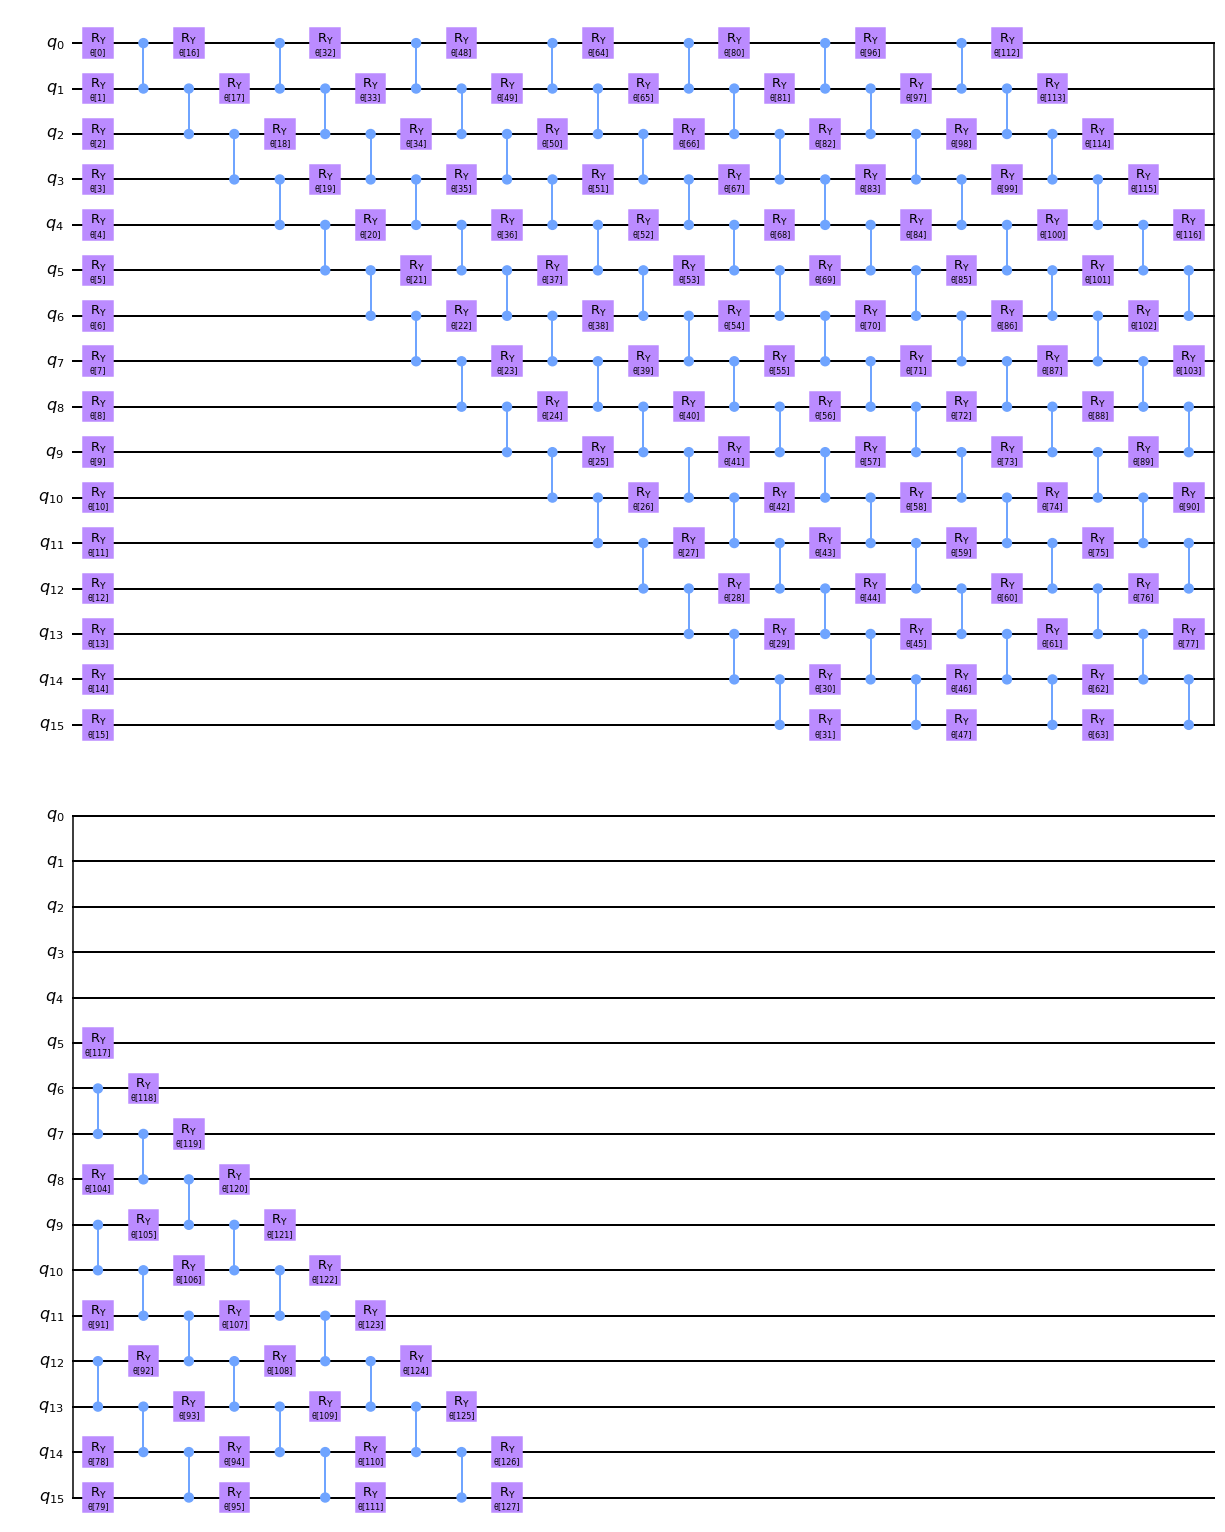

In [12]:
qc = QuantumCircuit(qubitOp.num_qubits)
qc += ry
print(qc.decompose().draw())
print(ry.type)

In [48]:
headers = {
  'Authorization': f'Bearer 33ce7c5cd257ba06b8d1bd50a7b94561e0d472b1e566e1f2fe71e9a9f153060950e27d5cfb932246ffed817eeb9e1a47b2f5f9ab566cf04c921b7f5745735b45',
  'Content-Type': 'application/json'
}

Runtime_API_URL = "https://runtime-us-east.quantum-computing.ibm.com/"

In [14]:
ansatz = ry

np.random.seed(10)  # seed for reproducibility
initial_point = np.random.random(ansatz.num_parameters)

In [15]:
from qiskit import IBMQ

IBMQ.load_account()
provider = IBMQ.get_provider()  # replace by your designated provider


ibmqfactory.load_account:WARNING:2021-08-30 18:55:40,835: Credentials are already in use. The existing account in the session will be replaced.


In [16]:
backend = provider.get_backend('ibmq_qasm_simulator')


In [17]:
intermediate_info = {
    'nfev': [],
    'parameters': [],
    'energy': [],
    'stddev': []
}

def callback(nfev, parameters, energy, stddev):
    intermediate_info['nfev'].append(nfev)
    intermediate_info['parameters'].append(parameters)
    intermediate_info['energy'].append(energy)
    intermediate_info['stddev'].append(stddev)

In [18]:
measurement_error_mitigation = True

from qiskit_optimization.runtime import VQEProgram

# in this first release, the optimizer must be specified as dictionary
optimizer = {'name': 'SPSA',
             'maxiter': 300}

runtime_vqe = VQEProgram(ansatz=qc,
                         optimizer=optimizer,
                         provider=provider,
                         backend=backend,
                         shots=1024,
                         measurement_error_mitigation=measurement_error_mitigation,
                         callback=callback)

In [24]:
runtime_result = runtime_vqe.compute_minimum_eigenvalue(qubitOp)

runtime_job._start_websocket_client:WARNING:2021-08-30 19:23:44,897: An error occurred while streaming results from the server for job c4mimrcuo4nnsj0kaau0:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/qiskit/providers/ibmq/runtime/runtime_job.py", line 325, in _start_websocket_client
    self._ws_client.job_results()
  File "/opt/conda/lib/python3.8/site-packages/qiskit/providers/ibmq/api/clients/runtime_ws.py", line 74, in job_results
    self.stream(url=url, retries=max_retries, backoff_factor=backoff_factor)
  File "/opt/conda/lib/python3.8/site-packages/qiskit/providers/ibmq/api/clients/base.py", line 211, in stream
    raise WebsocketError(error_message)
qiskit.providers.ibmq.api.exceptions.WebsocketError: 'Max retries exceeded: Failed to establish a websocket connection. Error: Traceback (most recent call last):\n  File "/opt/conda/lib/python3.8/site-packages/websocket/_app.py", line 369, in run_forever\n    dispatcher.read(self.sock.sock, re

KeyboardInterrupt: 

In [ ]:

print('Eigenvalue:', runtime_result.eigenvalue)
print('Target:', target_energy)
print('Mean error:', np.mean(intermediate_info['stddev']))


In [ ]:
history = runtime_result.optimizer_history

loss = history['loss']
timestamps = history['time']

runtimes = np.concatenate(([0], np.diff(timestamps)))
runtimes_in_min = runtimes / 60

In [ ]:
print(f'Total time taken: {np.sum(runtimes_in_min):.2f}min\n')

# note that the median and average might differ, since the device get's calibrated every hour
# resulting in some iteration times that are much larger than the rest
print(f'Median time of the iterations: {np.median(runtimes):.2f}s')
print(f'Average time per iteration: {np.mean(runtimes):.2f}s')
print(f'Standard deviation: {np.std(runtimes):.2f}s')


In [45]:
#testing direct call
#
#
#
!{sys.executable} -m pip install json-tricks
from json_tricks import 
from qiskit.opflow import OperatorBase, PauliSumOp
from qiskit.quantum_info import SparsePauliOp

primitive = SparsePauliOp(qubitOp.primitive)
operator= PauliSumOp(primitive, qubitOp.coeff)

Runtime_program = "vqe"
qc1 = jsonpickle.encode(qc)
operator1 = jsonpickle.encode(operator)
vqe_inputs = {
    'ansatz': qc1,
    'operator': operator1,
    'optimizer': {'name': 'SPSA', 'maxiter': 300},  # let's only do a few iterations!
    'measurement_error_mitigation': True,
    'shots': 1024
}

print(json.dumps(vqe_inputs))

{"ansatz": "{\"py/object\": \"qiskit.circuit.quantumcircuit.QuantumCircuit\", \"_base_name\": \"circuit\", \"name\": \"circuit-348\", \"_data\": [{\"py/tuple\": [{\"py/object\": \"qiskit.circuit.gate.Gate\", \"_definition\": {\"py/object\": \"qiskit.circuit.quantumcircuit.QuantumCircuit\", \"_base_name\": \"TwoLocal\", \"name\": \"TwoLocal\", \"_data\": [{\"py/tuple\": [{\"py/object\": \"qiskit.circuit.library.standard_gates.ry.RYGate\", \"_definition\": null, \"name\": \"ry\", \"num_qubits\": 1, \"num_clbits\": 0, \"_params\": [{\"py/object\": \"qiskit.circuit.parametervector.ParameterVectorElement\", \"py/newargs\": {\"py/tuple\": [{\"py/object\": \"qiskit.circuit.parametervector.ParameterVector\", \"_name\": \"\\u03b8\", \"_params\": [{\"py/id\": 7}, {\"py/object\": \"qiskit.circuit.parametervector.ParameterVectorElement\", \"py/newargs\": {\"py/tuple\": [{\"py/id\": 8}, 1, {\"py/object\": \"uuid.UUID\", \"hex\": \"2f01a6a970924310a09cd615ac30a2ea\"}]}, \"py/state\": {\"name\": \"\\

In [52]:

def run_runtime_program(program_name, program_inputs):
    # configuing your IBM Provider data
    params = json.dumps({
      "programId": "vqe",
      "hub": "ibm-q",
      "group": "open",
      "project": "main",
      "backend": "ibmq_qasm_simulator",
      "params": [
        json.dumps(program_inputs)
      ]
    })

    job_ID = ''
    final_result = False

    while not final_result:

        response = requests.get(Runtime_API_URL + 'jobs/'+ job_ID +'/results', data=params, headers=headers)
        if response.status_code == 200:
            print(f'Final Result: {response.text}')
            final_result = True

        elif response.status_code == 204:
            print(f'Waiting for the final result')
            time.sleep(2)

        else:
            print(f'Error:{response.status_code}')
            break


status, job_ID = run_runtime_program(Runtime_program, vqe_inputs)

print(f' status: {status}, Job: {job_ID}')

Error:404
Traceback (most recent call last):
  File "<ipython-input-52-a7fc61016b73>", line 33, in <module>
    status, job_ID = run_runtime_program(Runtime_program, vqe_inputs)
TypeError: cannot unpack non-iterable NoneType object

Use %tb to get the full traceback.


In [50]:
# You are going to get a 204 status code while the Qiskit program is still running.



Traceback (most recent call last):
  File "<ipython-input-50-ea3c4a7af1aa>", line 7, in <module>
    response = requests.get(Runtime_API_URL + 'jobs/'+ job_ID +'/results', data=params, headers=headers)
NameError: name 'params' is not defined

Use %tb to get the full traceback.


In [22]:
#testing local call
intermediate_info = {
    'nfev': [],
    'parameters': [],
    'energy': [],
    'stddev': []
}

def raw_callback(*args):
    job_id, (nfev, parameters, energy, stddev) = args
    intermediate_info['nfev'].append(nfev)
    intermediate_info['parameters'].append(parameters)
    intermediate_info['energy'].append(energy)
    intermediate_info['stddev'].append(stddev)

In [23]:
job = provider.runtime.run(
    program_id='vqe',
    inputs=vqe_inputs,
    options=backend_options,
    callback=raw_callback
)
print('Job ID:', job.job_id())

Traceback (most recent call last):
  File "<ipython-input-23-b8ae9fb60610>", line 1, in <module>
    job = provider.runtime.run(
  File "/opt/conda/lib/python3.8/site-packages/qiskit/providers/ibmq/runtime/ibm_runtime_service.py", line 237, in run
    response = self._api_client.program_run(program_id=program_id,
  File "/opt/conda/lib/python3.8/site-packages/qiskit/providers/ibmq/api/clients/runtime.py", line 141, in program_run
    return self.api.program_run(program_id=program_id, hub=credentials.hub,
  File "/opt/conda/lib/python3.8/site-packages/qiskit/providers/ibmq/api/rest/runtime.py", line 151, in program_run
    return self.session.post(url, data=data).json()
  File "/opt/conda/lib/python3.8/site-packages/requests/sessions.py", line 590, in post
    return self.request('POST', url, data=data, json=json, **kwargs)
  File "/opt/conda/lib/python3.8/site-packages/qiskit/providers/ibmq/api/session.py", line 300, in request
    raise RequestsApiError(message, status_code) from ex
R

In [ ]:
result = job.result()

In [ ]:
print(f'Reached {result["optimal_value"]} after {result["optimizer_evals"]} evaluations.')